In [1]:
#
import numpy as np
import math
import random
import pylab as pl
import pandas as pd
import pandas 
import csv

# Visualisasi Grafik
import matplotlib.pyplot as plt

# Split data (data train & data test)
from sklearn.model_selection import train_test_split

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Model LSTM
from keras.layers import LSTM, Dense
from keras.models import Sequential

# Evaluasi Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# Upload dataset
data = pd.read_excel('Dataset BPJ Purwodadi 2023.xlsx')
data['tanggal'] = pd.to_datetime(data['tanggal'])
data

,tanggal,lubang_sisa_kemarin,lubang_baru_hari_ini,jumlah_lubang_hari_ini,penanganan_lubang_hari_ini,jumlah_sisa_lubang_hari_ini
0,2023-01-01,305,0,305,0,305
1,2023-01-02,305,216,521,123,398
2,2023-01-03,398,101,499,146,353
3,2023-01-04,353,78,431,105,326
4,2023-01-05,326,176,502,180,322
...,...,...,...,...,...,...
360,2023-12-27,55,7,62,7,55
361,2023-12-28,55,16,71,16,55
362,2023-12-29,55,6,61,6,55
363,2023-12-30,55,0,55,2,53


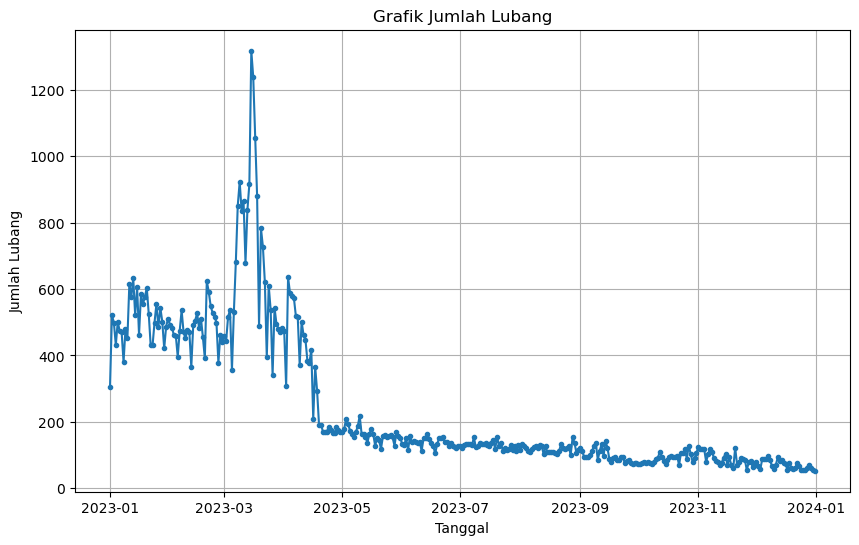

In [3]:
# Grafik Jumlah Lubang Hari Ini
plt.figure(figsize=(10, 6))
plt.plot(data['tanggal'], data['jumlah_lubang_hari_ini'], marker='.', linestyle='-')
plt.title('Grafik Jumlah Lubang')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Lubang')
plt.grid(True)
plt.show()

In [4]:
# Memisahkan fitur dan target
X = data[['lubang_sisa_kemarin', 'lubang_baru_hari_ini', 'penanganan_lubang_hari_ini', 'jumlah_sisa_lubang_hari_ini']]
y = data['jumlah_lubang_hari_ini']

In [5]:
# Normalisasi/Scaling data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

In [6]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle=False)

In [7]:
# Mengubah dimensi untuk model LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [8]:
# Membuat model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Menyiapkan model untuk training
model.compile(optimizer='adam', loss='mean_squared_error')

# Melakukan training model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2, shuffle=False)



Epoch 1/50

10/10 - 5s - loss: 0.0569 - val_loss: 0.0082 - 5s/epoch - 454ms/step
Epoch 2/50
10/10 - 0s - loss: 0.0257 - val_loss: 0.0180 - 77ms/epoch - 8ms/step
Epoch 3/50
10/10 - 0s - loss: 0.0149 - val_loss: 0.0117 - 72ms/epoch - 7ms/step
Epoch 4/50
10/10 - 0s - loss: 0.0078 - val_loss: 0.0033 - 72ms/epoch - 7ms/step
Epoch 5/50
10/10 - 0s - loss: 0.0034 - val_loss: 4.3678e-04 - 72ms/epoch - 7ms/step
Epoch 6/50
10/10 - 0s - loss: 1.3048e-04 - val_loss: 5.7864e-05 - 69ms/epoch - 7ms/step
Epoch 7/50
10/10 - 0s - loss: 7.3858e-04 - val_loss: 2.8025e-04 - 73ms/epoch - 7ms/step
Epoch 8/50
10/10 - 0s - loss: 1.0406e-04 - val_loss: 1.1836e-04 - 72ms/epoch - 7ms/step
Epoch 9/50
10/10 - 0s - loss: 8.8129e-05 - val_loss: 1.2723e-05 - 74ms/epoch - 7ms/step
Epoch 10/50
10/10 - 0s - loss: 1.3934e-04 - val_loss: 2.9081e-05 - 71ms/epoch - 7ms/step
Epoch 11/50
10/10 - 0s - loss: 6.6508e-05 - val_loss: 1.3653e-05 - 73ms/epoch - 7ms/step
Epoch 12/50
10/10 - 0s - loss: 5.3947e-05 - val_loss: 1.8793e-0

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Evaluasi model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Train Loss: 0.0003
Test Loss: 0.0001


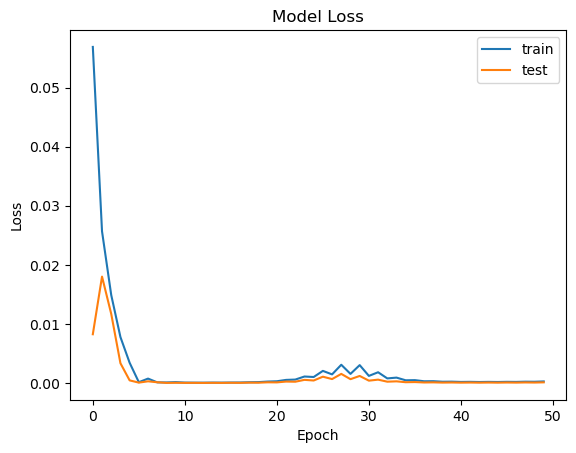

In [11]:
# Plot loss history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [12]:
# Melakukan prediksi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [13]:
# Invers transformasi untuk skala data
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

In [14]:
# Menghitung RMSE
rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Root Mean Squared Error (RMSE):", rmse)

# Menghitung MAPE
def calculate_mape(actual, predicted):
    mask = actual != 0
    return np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100
mape = calculate_mape(y_test, test_predict)
print("Mean Absolute Percentage Error (MAPE):", mape,"%")

Root Mean Squared Error (RMSE): 12.955974409261819
Mean Absolute Percentage Error (MAPE): 16.763002394596757 %


In [15]:
# Tabel Perbandingan
df_comparison = pd.DataFrame({'Tanggal': data.loc[data.index[-len(test_predict):], 'tanggal'], 
                              'Aktual': y_test.flatten(), 'Prediksi': test_predict.flatten()})

print("Tabel Perbandingan Jumlah Lubang Aktual dan Prediksi:")
print(df_comparison[['Tanggal', 'Aktual', 'Prediksi']])

pd.set_option('display.max_rows', None)  # Atur untuk menampilkan semua baris
pd.set_option('display.max_columns', None)  # Atur untuk menampilkan semua kolom

Tabel Perbandingan Jumlah Lubang Aktual dan Prediksi:
       Tanggal  Aktual    Prediksi
292 2023-10-20    93.0  105.464752
293 2023-10-21    98.0  109.709412
294 2023-10-22    70.0   84.640274
295 2023-10-23   107.0  116.615883
296 2023-10-24   105.0  117.391228
..         ...     ...         ...
360 2023-12-27    62.0   75.614128
361 2023-12-28    71.0   83.637238
362 2023-12-29    61.0   74.723831
363 2023-12-30    55.0   69.622017
364 2023-12-31    53.0   67.357910

[73 rows x 3 columns]


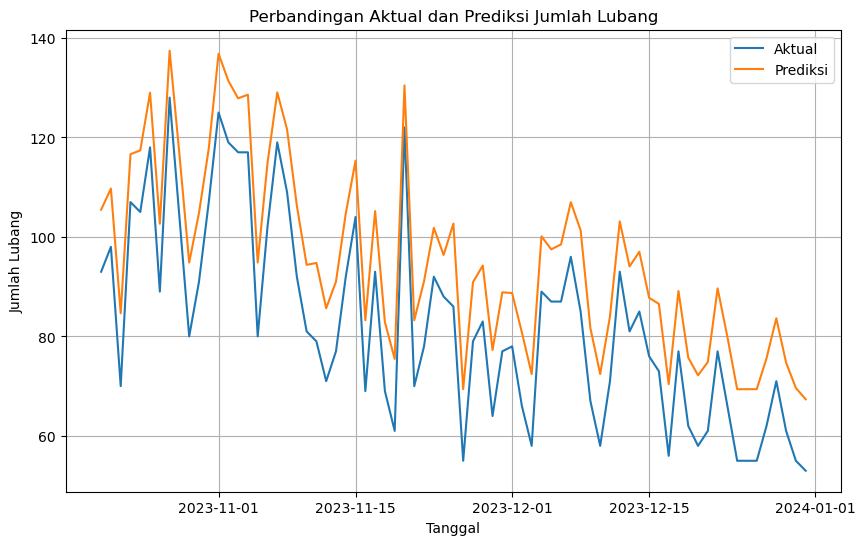

In [16]:
# Visualisasi hasil prediksi
index_y_test = range(len(y_test))

plt.figure(figsize=(10, 6))
plt.plot(data.loc[data.index[-len(y_test):], 'tanggal'], y_test, label='Aktual')
plt.plot(data.loc[data.index[-len(y_test):], 'tanggal'], test_predict, label='Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Lubang')
plt.title('Perbandingan Aktual dan Prediksi Jumlah Lubang')
plt.legend()
plt.grid(True)
plt.show()

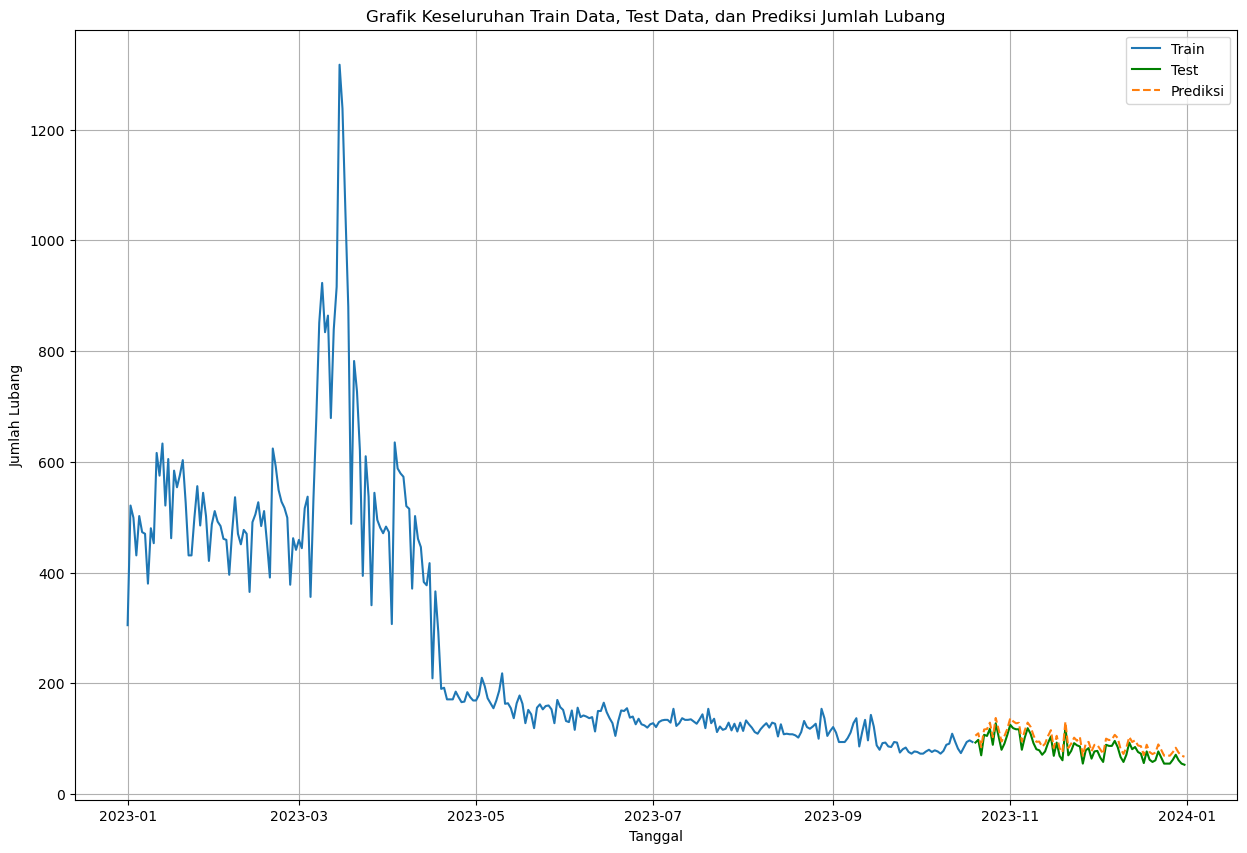

In [17]:
# Grafik Keseluruhan Jumlah Lubang (Data Train, Test, dan Prediksi)
plt.figure(figsize=(15, 10))

# Grafik train data
plt.plot(data['tanggal'][:-len(y_test)], y_train, linestyle='-', label='Train')

# Grafik test data
plt.plot(data['tanggal'][-len(y_test):], y_test, linestyle='-', color='green', label='Test')

# Grafik prediksi
plt.plot(data['tanggal'][-len(y_test):], test_predict, linestyle='--', label='Prediksi')

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Lubang')
plt.title('Grafik Keseluruhan Train Data, Test Data, dan Prediksi Jumlah Lubang')
plt.legend()
plt.grid(True)
plt.show()
